In [1]:
import pandas as pd
from scipy.stats import shapiro

data = pd.read_csv('sales_data.csv')
sales_data = data['sales']

statistic, p_value = shapiro(sales_data)

alpha = 0.05

print(f'Shapiro-Wilk Test Statistic: {statistic}')
print(f'P-value: {p_value}')

if p_value > alpha:
    print("Fail to reject the null hypothesis. The sales data is normally distributed.")
else:
    print("Reject the null hypothesis. The sales data is not normally distributed.")

Shapiro-Wilk Test Statistic: 0.9603165984153748
P-value: 0.000261976063484326
Reject the null hypothesis. The sales data is not normally distributed.


In [2]:
import pandas as pd
from scipy.stats import ttest_ind

data = pd.read_csv('sales_data.csv')
sales_a = data[data['store'] == 'A']['sales']
sales_b = data[data['store'] == 'B']['sales']

statistic, p_value = ttest_ind(sales_a, sales_b)

alpha = 0.05

print(f'T-test Statistic: {statistic}')
print(f'P-value: {p_value}')

if p_value > alpha:
    print("Fail to reject the null hypothesis. Sales are not significantly different between stores A and B.")
else:
    print("Reject the null hypothesis. Sales are significantly different between stores A and B.")

T-test Statistic: 1.8278932603495361
P-value: 0.06957941060834068
Fail to reject the null hypothesis. Sales are not significantly different between stores A and B.


In [3]:
import pandas as pd

data = pd.read_csv('sales_data.csv')
selected_columns = ['price', 'promotion', 'sales', 'inventory', 'customer_reviews', 'profit']

correlation_matrix = data[selected_columns].corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                     price  promotion     sales  inventory  customer_reviews  \
price             1.000000   0.038053  0.027275   0.025678         -0.145951   
promotion         0.038053   1.000000 -0.083977   0.100891          0.117205   
sales             0.027275  -0.083977  1.000000  -0.080141         -0.091605   
inventory         0.025678   0.100891 -0.080141   1.000000          0.091926   
customer_reviews -0.145951   0.117205 -0.091605   0.091926          1.000000   
profit            0.077067  -0.066937  0.049356   0.067996         -0.105505   

                    profit  
price             0.077067  
promotion        -0.066937  
sales             0.049356  
inventory         0.067996  
customer_reviews -0.105505  
profit            1.000000  


In [4]:
import pandas as pd
from scipy.stats import pearsonr

data = pd.read_csv('sales_data.csv')

sales = data['sales']
customer_reviews = data['customer_reviews']

correlation_coefficient, p_value = pearsonr(sales, customer_reviews)

alpha = 0.05

if p_value < alpha:
    print(f"There is a statistically significant correlation between 'sales' and 'customer_reviews'.")
else:
    print(f"There is no statistically significant correlation between 'sales' and 'customer_reviews'.")

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

There is no statistically significant correlation between 'sales' and 'customer_reviews'.
Pearson Correlation Coefficient: -0.09160484983254795
P-value: 0.26489919814898805


In [5]:
import pandas as pd

distance_data = {'Washington': [0, 5, 6, 8, 4, 7], 'New York': [5, 0, 9, 3, 5, 8], 'Chicago': [6, 9, 0, 5, 7, 5],'San Francisco': [8, 3, 5, 0, 6, 7],
'Miami': [4, 5, 7, 6, 0, 9],'Seattle': [7, 8, 5, 7, 9, 0]}

distance_df = pd.DataFrame(distance_data, index=['Washington', 'New York', 'Chicago', 'San Francisco', 'Miami', 'Seattle'])

average_travel_time = distance_df.mean(axis=1)
most_central_city = average_travel_time.idxmin()

print("Average Travel Times for All Cities:")
print(average_travel_time)
print("\nThe most centrally located city is:", most_central_city)
print(f"The average travel time to all other cities from {most_central_city} is: {average_travel_time[most_central_city]:.2f}")

Average Travel Times for All Cities:
Washington       5.000000
New York         5.000000
Chicago          5.333333
San Francisco    4.833333
Miami            5.166667
Seattle          6.000000
dtype: float64

The most centrally located city is: San Francisco
The average travel time to all other cities from San Francisco is: 4.83


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

data = pd.read_csv('sales_data.csv')

X = data[['price', 'promotion', 'sales', 'inventory', 'customer_reviews', 'profit']]
y = data['region']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

new_features = [[75, 0.4, 300, 130, 4, 8.0]]
predicted_region = model.predict(new_features)

print(f"Predicted Region: {predicted_region[0]}")

Predicted Region: East


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

data = pd.read_csv('sales_data.csv')

X = data[['price', 'promotion', 'sales', 'inventory', 'customer_reviews', 'profit']]
y = data['region']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_neighbors = 5
model = KNeighborsClassifier(n_neighbors=n_neighbors)
model.fit(X_train, y_train)

new_features = [[25.77, 0.292, 456, 40, 2, 5.579]]
predicted_region = model.predict(new_features)

print(f"Predicted Region: {predicted_region[0]}")

Predicted Region: South


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


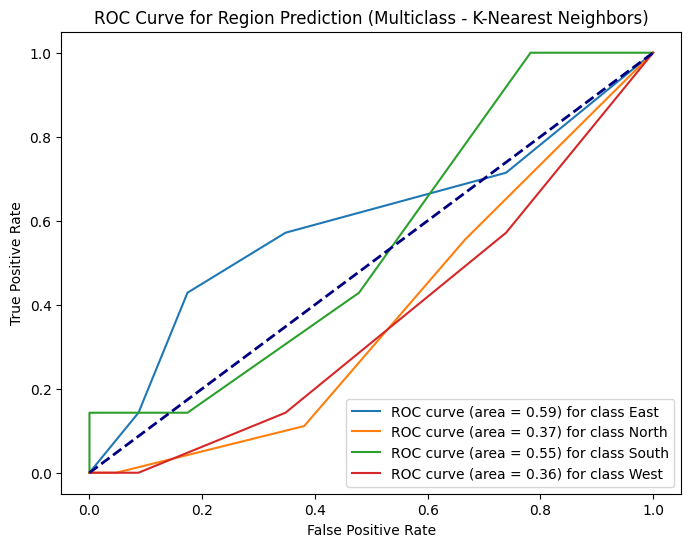

In [8]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

data = pd.read_csv('sales_data.csv')
X = data[['price', 'promotion', 'sales', 'inventory', 'customer_reviews', 'profit']]
y = data['region']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
n_neighbors = 5
knn_model_roc = KNeighborsClassifier(n_neighbors=n_neighbors)
knn_model_roc.fit(X_train, y_train)
probs_roc = knn_model_roc.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(knn_model_roc.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test, probs_roc[:, i], pos_label=knn_model_roc.classes_[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(len(knn_model_roc.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {knn_model_roc.classes_[i]}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Region Prediction (Multiclass - K-Nearest Neighbors)')
plt.legend(loc="lower right")
plt.show()